#  K-Means Clustering and Outlier Analysis


### Credit for  Assignment 3: 15/40 points of the final grade

Implement the K-means clustering algorithm. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)


/Users/mona/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Implementing and testing K-means clustering 
### Implementing K-Means clustering 
### Summary of `kmeans_clustering` Function

- **Purpose:** Implements the K-means clustering algorithm.
- **Inputs:**
  - `all_vals`: Data points (NumPy array)
  - `K`: Number of clusters
  - `max_iter`: Maximum iterations (default 100)
  - `tol`: Tolerance for convergence (default 0.001)
- **Process:**
  1. Randomly initializes K centroids from the data.
  2. Iteratively assigns each point to the nearest centroid, updates centroids, and computes the sum of squared errors (SSE).
  3. Checks for convergence based on SSE change or maximum iterations.
- **Returns:** Cluster assignments, final centroids, SSE history, and number of iterations.

In [ ]:
def kmeans_clustering(all_vals, K, max_iter=100, tol = pow(10,-3)):
    # Initialize centroids randomly
    centroids = all_vals[np.random.choice(all_vals.shape[0], K, replace=False)]
    
    all_sse = []  # To store the sum of squares of errors for each iteration
    iters = 0
    
    for i in range(max_iter):
        # Calculate distances between each data point and each centroid
        distances = np.linalg.norm(all_vals[:, None] - centroids, axis=2)
            
        
        # Assign data points to the closest centroid
        assignments = np.argmin(distances, axis=1)
        
        
        # Calculate the sum of squares of errors
        sse = np.sum(np.min(distances, axis=1)**2) # sum of sq for distance to closest centeroid

        all_sse.append(sse)
        
        # Update centroids as the mean of data points in each cluster
        new_centroids = np.array([all_vals[assignments == k].mean(axis=0) for k in range(K)])
        
        # Check convergence
        if i>0 and np.absolute(all_sse[i] - all_sse[i-1])/all_sse[i-1] <= tol:
            #print(distances)
        #if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
        #iters += 1

    return assignments, centroids, all_sse, i+1

### Visualizing K-means 
In this question we wll visualize the result of the K-means algorithm. In order to see the data in 2D we are going to use a dimensionality reduction method. we are going to use t-SNE. running K-means code with K=3 and default values for the rest of the inputs. Subsequently, make a single scatter plot that contains all data points of the dataset for the t-SNE representation and color every data point according to its cluster assignment.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


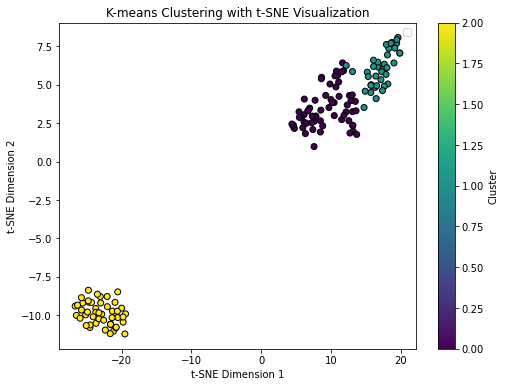

In [ ]:

from sklearn.manifold import TSNE



# Extract the features for t-SNE
X = data.drop('label', axis=1)

# Perform K-means clustering
assignments, centroids, all_sse, iters = kmeans_clustering(X.values, K=3,max_iter=100, tol=pow(10, -3))


# Perform t-SNE dimensionality reduction on X
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clustered data points with t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=assignments, cmap='viridis', edgecolor='k')
plt.colorbar(label='Cluster')
plt.title('K-means Clustering with t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

### Testing K-means 
Choosing the right number of clusters (K) in K-means is challenging without domain knowledge.
Plotting the sum of squared errors (SSE) versus K helps identify the point where increasing K yields diminishing returns.
The Silhouette coefficient measures how well each data point fits within its cluster.
For reliable results, run K-means multiple times for each K (from 2 to 5), and plot the mean SSE and mean Silhouette with error bars showing standard deviation.

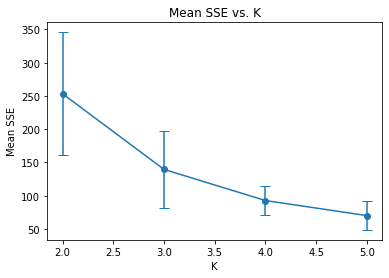

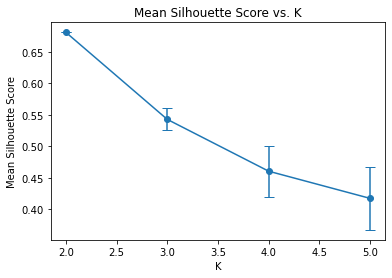

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data.drop('label', axis=1)
# Function to run K-means multiple times and collect SSE and Silhouette scores
def kmeans_multiple_times(X, K, num_iters):
    sse_values = []
    silhouette_values = []

    for i in range(num_iters):
        assignments, centroids, all_sse, iters = kmeans_clustering(X.values, K,max_iter=100, tol=pow(10, -3))
        # if i==49:
        #     print(all_sse)
        #     print(np.mean(all_sse))
        sse_values.append(np.mean(all_sse))
        #print(assignments)
        silhouette = silhouette_score(X, assignments)
        #print(silhouette)
        silhouette_values.append(silhouette)

    return sse_values, silhouette_values

# Parameters
K_range = range(2, 6)  # K values from 2 to 5
num_iters = 50         # Number of iterations per K

# Data (assuming X is your data array)

all_sse_means = []
all_silhouette_means = []
all_sse_stds = []
all_silhouette_stds = []

for K in K_range:
    sse_values, silhouette_values = kmeans_multiple_times(X, K, num_iters)
    
    all_sse_means.append(np.mean(sse_values))
    all_sse_stds.append(np.std(sse_values))
    
    all_silhouette_means.append(np.mean(silhouette_values))
    all_silhouette_stds.append(np.std(silhouette_values))

# Plotting SSE vs K
plt.errorbar(K_range, all_sse_means, yerr=all_sse_stds, fmt='-o', capsize=5)
plt.xlabel('K')
plt.ylabel('Mean SSE')
plt.title('Mean SSE vs. K')
plt.show()

# Plotting Silhouette vs K
plt.errorbar(K_range, all_silhouette_means, yerr=all_silhouette_stds, fmt='-o', capsize=5)
plt.xlabel('K')
plt.ylabel('Mean Silhouette Score')
plt.title('Mean Silhouette Score vs. K')
plt.show()

### K-means and outliers 
This section explores the effect of outliers on K-means clustering.
One artificial outlier is added to the Iris dataset and visualized using t-SNE.
For K=3, compare the average SSE and standard deviation for the original data versus data with the outlier using a bar chart.

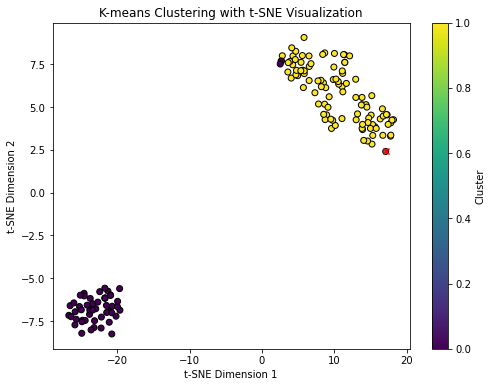

In [5]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)

# Generate an outlier by modifying one data point
outlier_index = 0  # Index to modify for outlier
outlier_value = [1000, 1000, 1000, 1000, "Outlier"]
#data_outliers = data.append(pd.Series(outlier_value, index=data.columns), ignore_index=True)
new_row = pd.DataFrame([outlier_value],  columns=data_names)
data_outliers=pd.concat([data, new_row], ignore_index=True)
#print(data_outliers)


X = data_outliers.drop('label', axis=1)

# Perform K-means clustering
assignments, centroids, all_sse, iters = kmeans_clustering(X.values, K=3,max_iter=100, tol=pow(10, -3))

#print(assignments)
# Perform t-SNE dimensionality reduction on X
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clustered data points with t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=assignments, cmap='viridis', edgecolor='k')
plt.scatter(X_tsne[-1, 0], X_tsne[-1, 1], c='red', marker='x', label='Outlier')

plt.colorbar(label='Cluster')
plt.title('K-means Clustering with t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

1114582.3492308247 1762434.2913887976


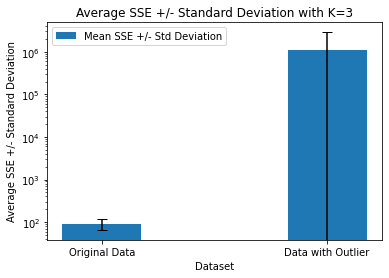

In [6]:

data = pd.read_csv('iris.data', names = data_names)


# Prepare the data for clustering without the label
X = data.drop(columns='label')
#print(X.tail)

assignments, centroids, all_sse, iters = kmeans_clustering(X.values, 3,max_iter=100, tol=pow(10, -3))
sse_original_mean = np.mean(all_sse)
sse_original_std = np.std(all_sse)
#print(sse_original_mean, sse_original_std )

# Insert an outlier
outlier = [1000, 1000, 1000, 1000, 'Outlier']
data_outlier = pd.DataFrame([outlier], columns=data_names)
data = pd.concat([data, data_outlier], ignore_index=True)

# Calculate SSE for data with outlier
X_outlier = data.drop(columns='label')
#print(X_outlier.tail)
assignments2, centroids2, all_sse2, iters2 = kmeans_clustering(X_outlier.values, 3,max_iter=100, tol=pow(10, -3))
sse_outlier_mean= np.mean(all_sse2)
sse_outlier_std =  np.std(all_sse2)
print(sse_outlier_mean, sse_outlier_std )
# Create a bar chart
labels = ['Original Data', 'Data with Outlier']
sse_means = [sse_original_mean, sse_outlier_mean]
sse_stds = [sse_original_std, sse_outlier_std]

x = np.arange(len(labels))
fig, ax = plt.subplots()
bar_width = 0.35

rects1 = ax.bar(x, sse_means, bar_width, yerr=sse_stds, capsize=5, label='Mean SSE +/- Std Deviation')
ax.semilogy()
ax.set_xlabel('Dataset')
ax.set_ylabel('Average SSE +/- Standard Deviation')
ax.set_title('Average SSE +/- Standard Deviation with K=3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()